In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

We`ll perform sentiment analysis on a corpus of movie reviews. We’re asked to label each phrase on a scale of zero to four. The sentiment corresponding to each of the labels are:

0: negative

1: somewhat negative

2: neutral

3: somewhat positive

4: positive

In [4]:
df_train = pd.read_csv('train.tsv',sep='\t')
print(df_train.shape)
df_train.head(10)

(156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [5]:
df_test = pd.read_csv('test.tsv',sep='\t')
print(df_test.shape)
df_test.head(10)

(66292, 3)


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
5,156066,8545,intermittently pleasing but
6,156067,8545,intermittently pleasing
7,156068,8545,intermittently
8,156069,8545,pleasing
9,156070,8545,but


In [8]:
replace_list = {r"i'm": 'i am',
                r"'re": ' are',
                r"let’s": 'let us',
                r"'s":  ' is',
                r"'ve": ' have',
                r"can't": 'can not',
                r"cannot": 'can not',
                r"shan’t": 'shall not',
                r"n't": ' not',
                r"'d": ' would',
                r"'ll": ' will',
                r"'scuse": 'excuse',
                ',': ' ,',
                '.': ' .',
                '!': ' !',
                '?': ' ?',
                '\s+': ' '}
def clean_text(txt):
    for x in replace_list:
        txt = txt.replace(x,replace_list[x])
    return ' '.join(txt.split())

In [10]:
x_train = df_train["Phrase"].apply(clean_text)

max phrase len:53


Text(0, 0.5, 'Probability')

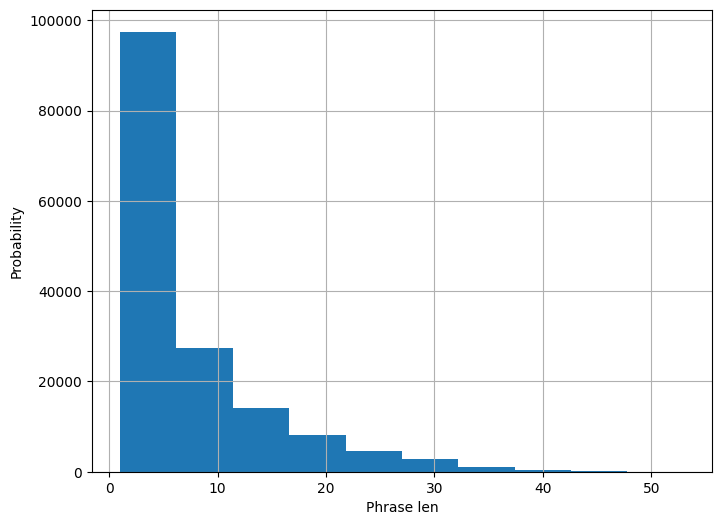

In [13]:
phrase_len = x_train.apply(lambda x :len(x.split(' ')))
max_phrase_len = phrase_len.max()
print(f"max phrase len:{max_phrase_len}")
plt.figure(figsize=(8,6))
plt.hist(phrase_len)
plt.grid()
plt.xlabel("Phrase len")
plt.ylabel("Probability")

In [14]:
y_train = df_train["Sentiment"]
max_words = 8192
tokenizer = Tokenizer(num_words=max_words,filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~')
tokenizer.fit_on_texts(x_train)

In [15]:
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train)
y_train = to_categorical(y_train)

In [16]:
batch_size = 512
epochs = 8

In [17]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(256, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

Increasing number of epochs will result in a better accuracy 

In [22]:
max_phrase_len

53

In [27]:
history = model_lstm.fit(
    x_train,
    y_train,
    validation_split = 0.1,
    epochs = 1,
    batch_size = 2048
)

69/69 [==============================] - 433s 6s/step - loss: 0.9161 - accuracy: 0.6331 - val_loss: 1.0177 - val_accuracy: 0.5924
